<a href="https://colab.research.google.com/github/juancarloscg/Time-Series/blob/master/ARIMA_for_Modelling_and_Forecasting_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARIMA for Modelling and Forecasting Time Series**

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.ar_model import AR,ARResults
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Mounting drive to access Google Drive
drive.mount('/content/drive')

#Converting to DataFrame and sorting values
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/uspopulation.csv', parse_dates=True,index_col='DATE')

data.index.freq='MS'
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


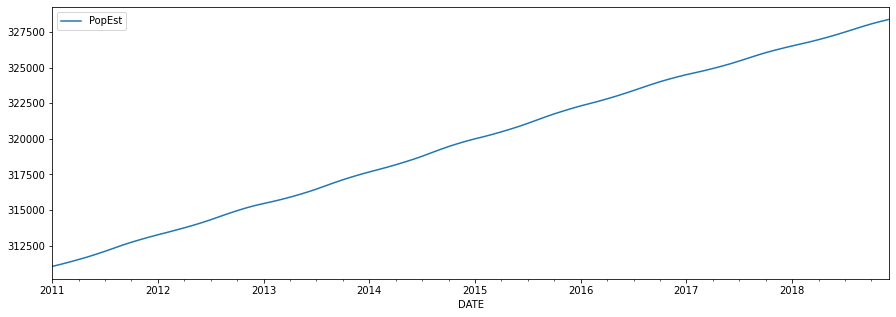

In [8]:
data.plot(figsize=(15,5))

In [0]:
train=data.iloc[:84]
test=data.iloc[84:]

In [0]:
model=AR(train['PopEst'])
AR1fit=model.fit(maxlag=1)

In [11]:
#This shows the level of the model (lag)
AR1fit.k_ar

1

In [12]:
#This shows the coef of the model
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [0]:
#To predict the test set
start=len(train)
end=len(train)+len(test)-1

predictions=AR1fit.predict(start=start,end=end)
predictions=predictions.rename('AR1 Predictions')

In [14]:
AR2fit=model.fit(maxlag=2)
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [0]:
predictions2=AR2fit.predict(start=start,end=end)
predictions2=predictions2.rename('AR2 Predictions')

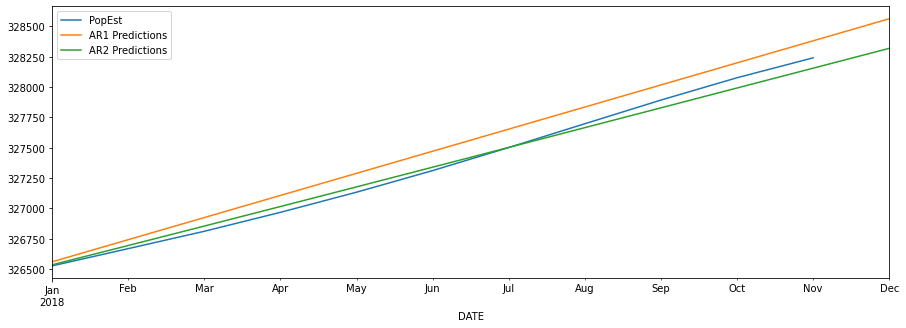

In [16]:
data[start:end].plot(figsize=(15,5), legend=True)
predictions.plot(legend=True);
predictions2.plot(legend=True);

In [0]:
#Now let's find the best level for AR with t-stat criterior
ARfit=model.fit(ic='t-stat')
ARfit.params
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR8 Predictions')

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
labels=['AR1','AR2','AR8']
preds=[predictions, predictions2, predictions8]

AR1 MSE was :17449.71423587912
AR2 MSE was :2713.2585540102214
AR8 MSE was :186.97053754548145


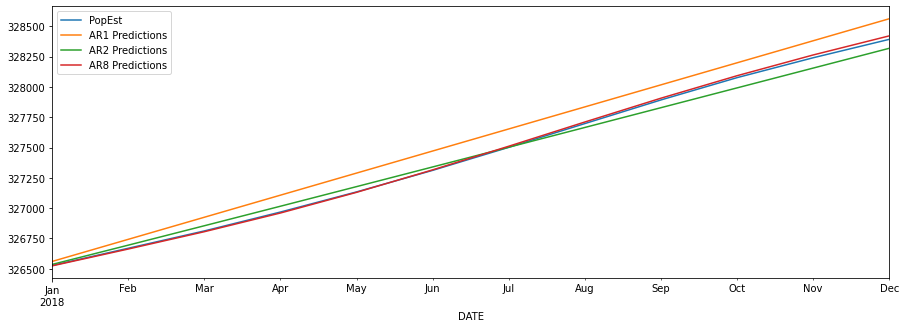

In [20]:
for i,pred in enumerate(preds):
    error=mean_squared_error(test['PopEst'],pred)
    print(f'{labels[i]} MSE was :{error}')


test.plot(figsize=(15,5), legend=True)
predictions.plot(legend=True);
predictions2.plot(legend=True);
predictions8.plot(legend=True)

AR(8) model is the best match. It shows the lowest MSE

Example forecasting into the future. Do not predict more into the future than the max length of the data set.

In [0]:
model = AR(data['PopEst'])
ARfit = model.fit()
forecast = ARfit.predict(start=len(data),end=len(data)+12).rename('Forecast')

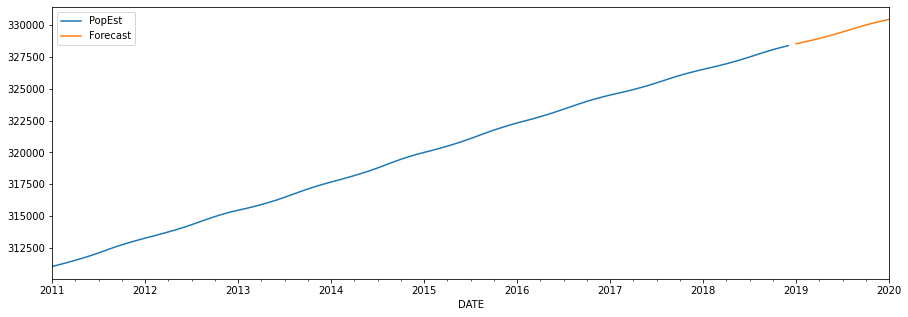

In [22]:
data['PopEst'].plot(figsize=(15,5),legend=True)
forecast.plot(legend=True)

## **Selecting parameters for the ARIMA Model**

In [0]:
#Non-stationay dataset
data_nonst=pd.read_csv('/content/drive/My Drive/Colab Notebooks/airline_passengers.csv', parse_dates=True,index_col='Month')
data_nonst.index.freq='MS'

#Stationay dataset
data_st= pd.read_csv('/content/drive/My Drive/Colab Notebooks/DailyTotalFemaleBirths.csv', parse_dates=True,index_col='Date')
data_st.index.freq='D'

In [0]:
from pmdarima import auto_arima

In [6]:
stepw = auto_arima(data_st['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False, trace=True)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=2650.760, BIC=2658.555, Time=0.040 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=2565.234, BIC=2576.925, Time=0.069 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=2463.584, BIC=2475.275, Time=0.150 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=2648.768, BIC=2652.665, Time=0.021 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=2460.154, BIC=2475.743, Time=0.302 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=2461.271, BIC=2480.757, Time=0.360 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=2460.689, BIC=2480.175, Time=0.679 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=2460.722, BIC=2476.311, Time=0.268 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=2536.154, BIC

In [7]:
stepw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.077
Date:                Sun, 24 May 2020   AIC                           2460.154
Time:                        07:54:20   BIC                           2475.743
Sample:                             0   HQIC                          2466.350
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.014      0.975      0.330      -0.013       0.040
ar.L1          0.1299      0.059      2.217      0.027       0.015       0.245
ma.L1         -0.9694      0.016    -62.235      0.000      -1.000      -0.939
sigma2        48.9989      3.432     14.279      0.000      42.273      55.725
===================================================================================
Ljung-Box (Q):                       36.69   Jarque-Bera (JB):                26.17
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.58
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
stepw2=auto_arima(data_nonst['Thousands of Passengers'],start_p=0, strat_q=0,max_p=4,max_q=4,seasonal=True,trace=True, m=12)


Performing stepwise search to minimize aic
Fit ARIMA(0,1,2)x(1,1,1,12) [intercept=True]; AIC=1024.206, BIC=1041.457, Time=1.562 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.028 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=0.547 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=0.688 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.026 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=1022.343, BIC=1030.968, Time=0.132 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=1021.137, BIC=1035.513, Time=1.711 seconds
Fit ARIMA(1,1,0)x(2,1,1,12) [intercept=True]; AIC=1017.166, BIC=1034.417, Time=5.852 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=102

In [9]:
stepw2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.920
Date:                            Sun, 24 May 2020   AIC                           1015.841
Time:                                    07:55:00   BIC                           1033.092
Sample:                                         0   HQIC                          1022.850
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.032      0.010      0.992      -0.062       0.063
ma.L1         -0.4243      0.068     -6.211      0.000      -0.558      -0.290
ar.S.L12       0.6656      0.155      4.296      0.000       0.362       0.969
ar.S.L24       0.3330      0.096      3.479      0.001       0.145       0.521
ma.S.L12      -0.9754      1.265     -0.771      0.441      -3.454       1.503
sigma2       110.3992    117.291      0.941      0.347    -119.486     340.285
===================================================================================
Ljung-Box (Q):                       53.12   Jarque-Bera (JB):                 7.57
Prob(Q):                              0.08   Prob(JB):                         0.02
Heteroskedasticity (H):               2.83   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **ARMA Model**

In [0]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [0]:
#Loading data
data_trade= pd.read_csv('/content/drive/My Drive/Colab Notebooks/TradeInventories.csv', parse_dates=True,index_col='Date')
data_trade.index.freq='MS'

data_st2=data_st[:120]

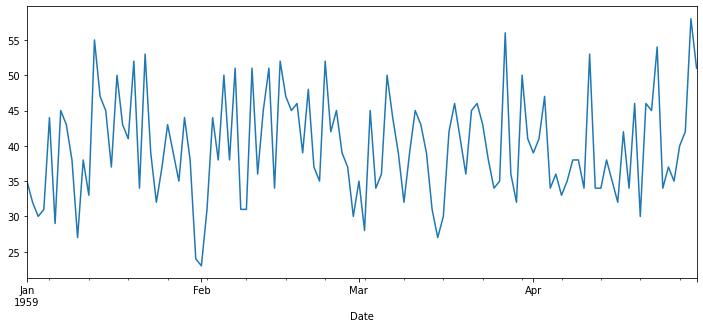

In [12]:
data_st2['Births'].plot(figsize=(12,5))

In [13]:
from statsmodels.tsa.stattools import adfuller

testdata= adfuller(data_st2['Births'])
dtout=pd.Series(testdata[0:4],index=['ADF test Statistic','p-value','#Lags Used','# Observations'])

for key,val in testdata[4].items():
    dtout[f'critical value ({key})']=val

dtout

ADF test Statistic     -9.855384e+00
p-value                 4.373545e-17
#Lags Used              0.000000e+00
# Observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
dtype: float64

**This shows that data is stationary**

In [14]:
auto_arima(data_st2['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sun, 24 May 2020   AIC                            823.489
Time:                        07:55:21   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
train_data=data_st2.iloc[:90]
test_data=data_st2.iloc[90:]

In [0]:
model = ARMA(train_data['Births'],order=(2,2))
results = model.fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sun, 24 May 2020   AIC                            627.809
Time:                        07:55:31   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.608      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

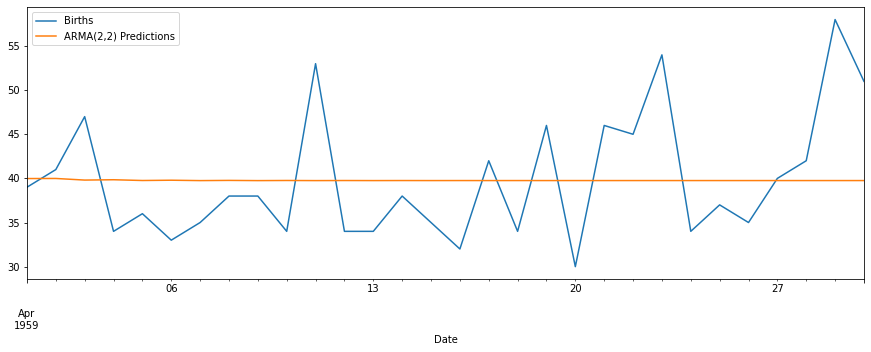

In [18]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results.predict(start,end).rename('ARMA(2,2) Predictions')
data_st2[90:].plot(figsize=(15,5), legend=True)
predictions.plot(legend=True);

This model is just able to predict the mean of the values but not the whole

In [19]:
data_trade.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


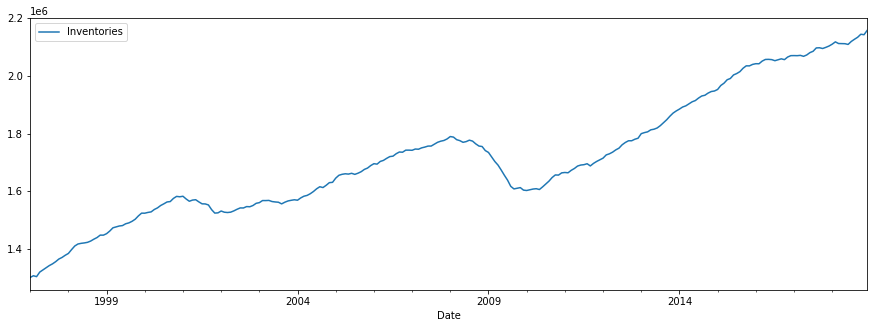

In [21]:
data_trade.plot(figsize=(15,5))

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

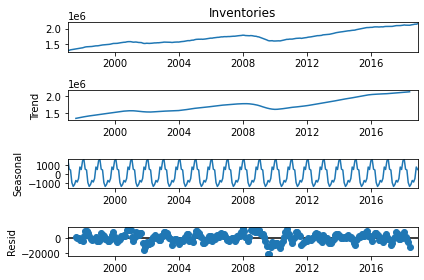

In [44]:
results = seasonal_decompose(data_trade['Inventories'],model='add')
results.plot();

In [45]:
auto_arima(data_trade['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  263
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2662.267
Date:                Sun, 24 May 2020   AIC                           5328.534
Time:                        08:22:49   BIC                           5335.671
Sample:                             0   HQIC                          5331.403
                                - 263                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3248.2252    472.070      6.881      0.000    2322.986    4173.465
sigma2      3.922e+07   2.97e+06     13.208      0.000    3.34e+07     4.5e+07
===================================================================================
Ljung-Box (Q):                      452.93   Jarque-Bera (JB):                98.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -1.14
Prob(H) (two-sided):                  0.35   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
from statsmodels.tsa.statespace.tools import diff

In [0]:
data_trade['Diff1']=diff(data_trade['Inventories'],k_diff=1)

In [0]:
from statsmodels.tsa.stattools import adfuller

In [38]:
data_trade.dropna(inplace=True)
testdata=adfuller(data_trade['Diff1'])

dtout=pd.Series(testdata[0:4],index=['ADF test Statistic','p-value','#Lags Used','# Observations'])
for key,val in testdata[4].items():
    dtout[f'critical value ({key})']=val

dtout

ADF test Statistic       -3.412249
p-value                   0.010548
#Lags Used                4.000000
# Observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
dtype: float64

Data is stationary

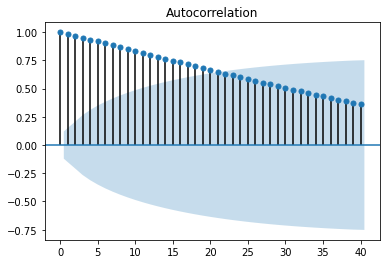

In [40]:
plot_acf(data_trade['Inventories'],lags=40);

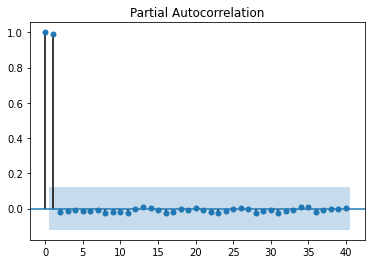

In [41]:
plot_pacf(data_trade['Inventories'],lags=40);

In [47]:
stepwise=auto_arima(data_trade['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,seasonal=False,trace=True)
stepwise.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=5328.534, BIC=5335.671, Time=0.018 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=5383.943, BIC=5394.649, Time=0.088 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=5332.260, BIC=5342.965, Time=0.059 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=5388.952, BIC=5392.521, Time=0.013 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=5358.890, BIC=5373.164, Time=0.228 seconds
Total fit time: 0.412 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  263
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2662.267
Date:                Sun, 24 May 2020   AIC                           5328.534
Time:                        08:24:25   BIC                           5335.671
Sample:                             0   HQIC                          5331.403
                                - 263                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3248.2252    472.070      6.881      0.000    2322.986    4173.465
sigma2      3.922e+07   2.97e+06     13.208      0.000    3.34e+07     4.5e+07
===================================================================================
Ljung-Box (Q):                      452.93   Jarque-Bera (JB):                98.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -1.14
Prob(H) (two-sided):                  0.35   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""